# kNN detail

In [1]:
import numpy as np

def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

group, labels = createDataSet()

In [2]:
# classify0 함수의 매개변수 설정
# dataSet: numpy.ndarray 타입
inX = [0, 0.15]
dataSet = group
k = 3

In [3]:
# 데이터 수 (2차원 배열의 행 개수) -- Python3 에선 불필요
dataSetSize = dataSet.shape[0]; dataSetSize

4L

In [4]:
# tile 설명!! 
np.tile(inX,(dataSetSize, 1)) # (4,1) 이지!!! 

array([[ 0.  ,  0.15],
       [ 0.  ,  0.15],
       [ 0.  ,  0.15],
       [ 0.  ,  0.15]])

In [5]:
diffMat = inX - dataSet; diffMat

array([[-1.  , -0.95],
       [-1.  , -0.85],
       [ 0.  ,  0.15],
       [ 0.  ,  0.05]])

In [6]:
sqDiffMat = diffMat**2; sqDiffMat

array([[ 1.    ,  0.9025],
       [ 1.    ,  0.7225],
       [ 0.    ,  0.0225],
       [ 0.    ,  0.0025]])

In [7]:
distances = sqDiffMat.sum(axis=1); distances   # row-wise summation

array([ 1.9025,  1.7225,  0.0225,  0.0025])

In [8]:
    sortedDistIndices = distances.argsort(); sortedDistIndices

array([3, 2, 1, 0], dtype=int64)

- for문 풀어해침 아래!!!

In [9]:
classCount = {}

In [10]:
k = 3 # ***가장가까운 3개를 가지고 판단하겠다!!! 

In [11]:
i = 0

In [12]:
labels[3]

'B'

In [13]:
votelabel = labels[sortedDistIndices[i]]

In [14]:
votelabel # sort된 index를 참고해서 가장 가까운 label을 가져옴!!! 

'B'

In [15]:
classCount[votelabel] = classCount.get(votelabel, 0) + 1

- 누적해서 합하기 위해서 위와 같이 함!!!

    default 값으로 0을 준거지!!!

In [16]:
classCount

{'B': 1}

In [17]:
i = 1
votelabel = labels[sortedDistIndices[i]]
classCount[votelabel] = classCount.get(votelabel, 0) + 1

In [18]:
classCount

{'B': 2}

In [19]:
i = 2
votelabel = labels[sortedDistIndices[i]]
classCount[votelabel] = classCount.get(votelabel, 0) + 1
classCount

{'A': 1, 'B': 2}

- 위를 FOR 문으로 했던 거다!!  k번 반복!
- if 문 쓰기 싫어서 get 사용으로 대체했고!!

In [20]:
classCount.iteritems()

<dictionary-itemiterator at 0x580d098>

In [21]:
list(classCount.iteritems()) # 사전을 튜플로 묶어서 LIST로 반환하는 것이 iteritems() 이다!!!

[('A', 1), ('B', 2)]

In [22]:
import operator
operator.itemgetter(1)

- 위 값(1)을 꺼내와서 sort 하라는 거다!!! 

In [23]:
sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)   #3
# key 부분함 함수를 쓴거다. operator.itemgetter(1) 1을 했으니 값을가져오는거다.
# reverse로 내림차순!!! 

In [24]:
sortedClassCount

[('B', 2), ('A', 1)]

In [25]:
sortedClassCount[0][0]

'B'

- k개를 봤더니, 가장 가까운 것이 B였다!!! 

In [26]:
import kNN
#reload(kNN)

- 위 안되지 전에 한번 import 했으니!! reload 를 해야한다!! 
- kNN.py 파일에서 코드 참고한다!!

In [27]:
reload(kNN)

<module 'kNN' from 'kNN.pyc'>

In [28]:
kNN.classify0([0, 0.5], dataSet, labels, 3)

'B'

In [29]:
kNN.classify0([0.8, 0.4], dataSet, labels, 3)

'A'

In [30]:
kNN.classify0([0.8, 0.4], dataSet, labels)

'A'

# listing 2.2

In [31]:
filename = 'datingTestSet2.txt'

In [32]:
fr = open(filename)

In [33]:
fr.readlines()

['40920\t8.326976\t0.953952\t3\n',
 '14488\t7.153469\t1.673904\t2\n',
 '26052\t1.441871\t0.805124\t1\n',
 '75136\t13.147394\t0.428964\t1\n',
 '38344\t1.669788\t0.134296\t1\n',
 '72993\t10.141740\t1.032955\t1\n',
 '35948\t6.830792\t1.213192\t3\n',
 '42666\t13.276369\t0.543880\t3\n',
 '67497\t8.631577\t0.749278\t1\n',
 '35483\t12.273169\t1.508053\t3\n',
 '50242\t3.723498\t0.831917\t1\n',
 '63275\t8.385879\t1.669485\t1\n',
 '5569\t4.875435\t0.728658\t2\n',
 '51052\t4.680098\t0.625224\t1\n',
 '77372\t15.299570\t0.331351\t1\n',
 '43673\t1.889461\t0.191283\t1\n',
 '61364\t7.516754\t1.269164\t1\n',
 '69673\t14.239195\t0.261333\t1\n',
 '15669\t0.000000\t1.250185\t2\n',
 '28488\t10.528555\t1.304844\t3\n',
 '6487\t3.540265\t0.822483\t2\n',
 '37708\t2.991551\t0.833920\t1\n',
 '22620\t5.297865\t0.638306\t2\n',
 '28782\t6.593803\t0.187108\t3\n',
 '19739\t2.816760\t1.686209\t2\n',
 '36788\t12.458258\t0.649617\t3\n',
 '5741\t0.000000\t1.656418\t2\n',
 '28567\t9.968648\t0.731232\t3\n',
 '6808\t1.36483

In [34]:
numberOfLines = len(fr.readlines()); numberOfLines
# 읽고난 후여서 처음부터 읽지 못하는 거다!!! 

0

In [35]:
fr = open(filename)
numberOfLines = len(fr.readlines()); numberOfLines

1000

In [36]:
import numpy as np

In [37]:
returnMat = np.zeros((numberOfLines, 3)); returnMat
# 1000 x 3 행렬을 만들어 둔다!! 
# 미리 공간을 확보해 두는거다!!!

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [38]:
classLabelVector = []

In [39]:
import kNN

In [40]:
reload(kNN)

<module 'kNN' from 'kNN.pyc'>

In [41]:
datingDateMat, datingLabels = kNN.file2matrix(filename)

In [42]:
print datingDateMat
print datingLabels

[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]
 ..., 
 [  2.65750000e+04   1.06501020e+01   8.66627000e-01]
 [  4.81110000e+04   9.13452800e+00   7.28045000e-01]
 [  4.37570000e+04   7.88260100e+00   1.33244600e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2

In [43]:
mapping = {1:'didnt like', 2:'small doses', 3:'large doses'}; mapping

{1: 'didnt like', 2: 'small doses', 3: 'large doses'}

In [44]:
datingLabels_str = [ mapping[label] for label in datingLabels]; datingLabels_str

['large doses',
 'small doses',
 'didnt like',
 'didnt like',
 'didnt like',
 'didnt like',
 'large doses',
 'large doses',
 'didnt like',
 'large doses',
 'didnt like',
 'didnt like',
 'small doses',
 'didnt like',
 'didnt like',
 'didnt like',
 'didnt like',
 'didnt like',
 'small doses',
 'large doses',
 'small doses',
 'didnt like',
 'small doses',
 'large doses',
 'small doses',
 'large doses',
 'small doses',
 'large doses',
 'small doses',
 'didnt like',
 'large doses',
 'didnt like',
 'large doses',
 'didnt like',
 'small doses',
 'didnt like',
 'didnt like',
 'small doses',
 'large doses',
 'large doses',
 'didnt like',
 'small doses',
 'large doses',
 'large doses',
 'large doses',
 'didnt like',
 'didnt like',
 'didnt like',
 'didnt like',
 'small doses',
 'small doses',
 'didnt like',
 'large doses',
 'small doses',
 'small doses',
 'small doses',
 'small doses',
 'large doses',
 'didnt like',
 'small doses',
 'didnt like',
 'small doses',
 'small doses',
 'small doses',
 '

# 2.2.2 분석

In [45]:
import matplotlib
import matplotlib.pyplot as plt

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

In [47]:
# 게임 시간과, 아이스크립 섭취량
ax.scatter(datingDateMat[:,1], datingDateMat[:,2])

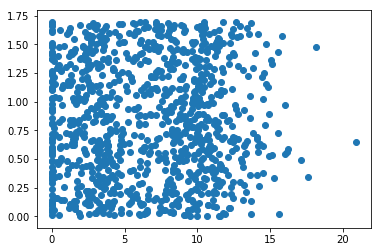

In [48]:
plt.show()

In [64]:
%matplotlib inline # plt.show() 매번 안하려고!!

UnicodeEncodeError: 'ascii' codec can't encode characters in position 37-38: ordinal not in range(128)

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDateMat[:,1], datingDateMat[:,2],
           15.0*np.array(datingLabels), 15.0*np.array(datingLabels))

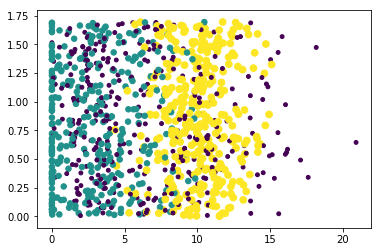

In [53]:
plt.show()

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDateMat[:,0], datingDateMat[:,1],
           15.0*np.array(datingLabels), 15.0*np.array(datingLabels))

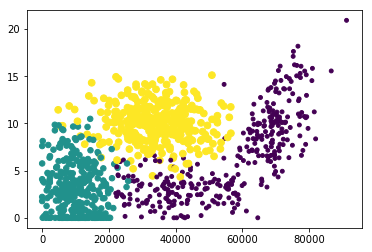

In [55]:
plt.show()

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDateMat[:,0], datingDateMat[:,2],
           15.0*np.array(datingLabels), 15.0*np.array(datingLabels))

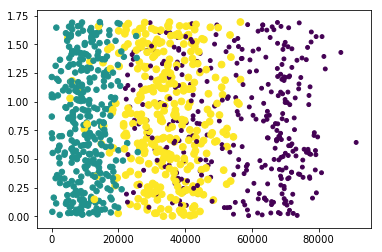

In [57]:
plt.show()

- Q. 3가지 그림을 한곳에 그릴 수 있겠지

- Q. 3D plot

### # 0과 1을 볼 때 가장 구분이 잘 되보이는 것을 알 수 있다,

# 2.2.3 준비: 정규화

In [58]:
import kNN
#reload(kNN)

In [61]:
reload(kNN)

<module 'kNN' from 'kNN.py'>

In [62]:
normMat, ranges, minVals = kNN.autoNorm(datingDateMat)

In [63]:
print(normMat)
print(ranges)
print(minVals)

[[ 0.44832535  0.39805139  0.56233353]
 [ 0.15873259  0.34195467  0.98724416]
 [ 0.28542943  0.06892523  0.47449629]
 ..., 
 [ 0.29115949  0.50910294  0.51079493]
 [ 0.52711097  0.43665451  0.4290048 ]
 [ 0.47940793  0.3768091   0.78571804]]
[  9.12730000e+04   2.09193490e+01   1.69436100e+00]
[ 0.        0.        0.001156]


# 2.2.4 검사 : 분류기 검사

In [75]:
reload(kNN)

<module 'kNN' from 'kNN.py'>

In [76]:
kNN.datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

# 2.2.5 사용, 값을 직접 받아서 !!!

In [84]:
reload(kNN)

<module 'kNN' from 'kNN.pyc'>

In [85]:
kNN.classifyPerson()

percentage of time spent playing video games?1
frequent flier miles earned per year?1
liters of ice cream consumed per year?1
You will probably like this person:  in small doses


## 2.3: 예제: 필기체 인식

In [21]:
import numpy as np
import kNN
reload(kNN)

<module 'kNN' from 'kNN.py'>

In [22]:
testVector = kNN.img2vector('digits/testDigits/0_13.txt')

In [23]:
type(testVector)

numpy.ndarray

In [24]:
testVector.shape

(1L, 1024L)

In [25]:
testVector[:32]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [26]:
testVector[0,32:64]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

## 2.3.2 검사: 필기체 번호에 kNN 적용

#### Listing 2.6 Handwritten digits testing code

In [27]:
import os

In [46]:
hwLabels = []

In [30]:
# 인자로 받은 디렉터리 내의 파일명을 수집하여 리스트로 반환
trainingFileList = os.listdir('digits/trainingDigits')

In [31]:
m = len(trainingFileList); m

1934

In [87]:
trainingMat = np.zeros((m,1024))
# 미리 공간확보해둠!!!

In [90]:
i = 2

fileNameStr = trainingFileList[i]; fileNameStr

fileStr = fileNameStr.split('.')[0]; fileStr
classNumStr = int(fileStr.split('_')[0]); classNumStr
# classNumStr = int(fileStr[0]); classNumStr
# classNumStr = int(fileNameStr.split('.')[0][0]); classNumStr
# 이렇게 1번에 붙여서 해결할 수도 있다!! 

hwLabels.append(classNumStr); hwLabels

test = kNN.img2vector('digits/trainingDigits/%s' % fileNameStr)
trainingMat[i, :] = kNN.img2vector('digits/trainingDigits/%s' % fileNameStr)
trainingMat


array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [76]:
test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [118]:
import kNN
reload(kNN)

<module 'kNN' from 'kNN.py'>

In [119]:
kNN.handwritingClassTest()

the classifier came back with: 1, the real answer is: 1

the total number of errors is: 0

the total error rate is: 0.000000
